<h2>
  <b>
    <u> The Problem Description: </u>
  </b>
</h2>
<p>
Recognizing multi-digit numbers in photographs captured at street level is an
important component of modern-day map making. A classic example of a
corpus of such street level photographs is Google’s Street View imagery
comprised of hundreds of millions of geo-located 360 degree panoramic
images. The ability to automatically transcribe an address number from a geolocated patch of pixels and associate the transcribed number with a known
street address helps pinpoint, with a high degree of accuracy, the
location of the building it represents.
</p>
<p>
More broadly, recognizing numbers in photographs is a problem of interest to
the optical character recognition community. While OCR on constrained
domains like document processing is well studied, arbitrary multi-character text
recognition in photographs is still highly challenging. This difficulty arises due to
the wide variability in the visual appearance of text in the wild on account of a
large range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such
as lighting, shadows, secularities, and occlusions as well as by image acquisition
factors such as resolution, motion, and focus blurs.
</p>

<p>
In this project we will use dataset with images centred around a single digit
(many of the images do contain some distractors at the sides). Although we are
taking a sample of the data which is simpler, it is more complex than MNIST
because of the distractors.
</p>

<h2>
  <b>
    <u> Data Description: </u>
  </b>
</h2>
<h3>
  <b>The Street View House Numbers (SVHN) Dataset</b>
</h3>
<p>
SVHN is a real-world image dataset for developing machine learning and object
recognition algorithms with minimal requirement on data formatting but comes
from a significantly harder, unsolved, real world problem (recognizing digits and
numbers in natural scene images). SVHN is obtained from house numbers in
Google Street View images.
</p>

<b>Importing Necessary Libraries</b>

In [56]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import  confusion_matrix, accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Sequential
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dataset_path = '/content/drive/MyDrive/GreatLearning/NeuralNetworkProject/SVHN_single_grey1.h5'

In [3]:
def fetchData(dataPath):
  ret_val = []
  h5f = h5py.File(dataPath,'r')
  keys = list(h5f.keys())
  for key in keys:
    ret_val.append(h5f[key][:])
  return tuple(ret_val)

**Reading Dataset**

In [4]:
X_test, X_train, X_val, y_test, y_train, y_val = fetchData(dataset_path)

In [5]:
X_test.shape, X_train.shape, X_val.shape

((18000, 32, 32), (42000, 32, 32), (60000, 32, 32))

**Checking for no of classes and value counts**

In [6]:
un_df_y_tr = pd.DataFrame(data=y_train, columns=["y"])
un_df_y_tst = pd.DataFrame(data=y_test, columns=["y"])
un_df_y_val = pd.DataFrame(data=y_val, columns=["y"])

In [7]:
len(un_df_y_tr["y"].unique()), len(un_df_y_tst["y"].unique()), len(un_df_y_val["y"].unique())

(10, 10, 10)

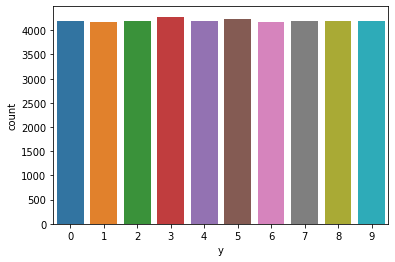

In [57]:
sns.countplot(un_df_y_tr.y)

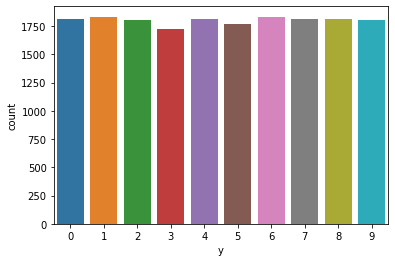

In [58]:
sns.countplot(un_df_y_tst.y)

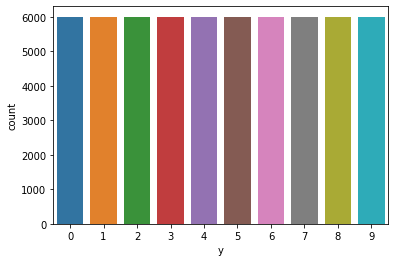

In [59]:
sns.countplot(un_df_y_val.y)

**One hot encoding the lable values**

In [8]:
num_classes = len(un_df_y_tr["y"].unique())

y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)

**Ploating Few images**

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3
label for each of the below image: 1
label for each of the below image: 0
label for each of the below image: 1
label for each of the below image: 3
label for each of the below image: 1
label for each of the below image: 1
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 8
label for each of the below image: 4


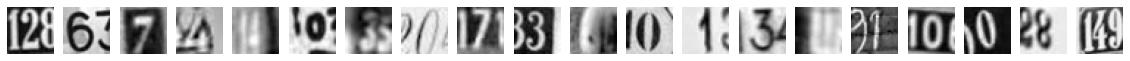

In [9]:
plt.figure(figsize=(20, 1))
for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    print('label for each of the below image: {}'.format((np.argmax(y_train[0:20][i]))))
plt.show()

**Reshaping the images (Flatning)**

In [10]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [11]:
X_train.shape, X_test.shape

((42000, 1024), (18000, 1024))

**Building Model**

In [12]:
model_w_bn_dl = Sequential()

In [13]:
model_w_bn_dl.add(Dense(50, input_shape = (1024, )))
model_w_bn_dl.add(Activation('relu'))
model_w_bn_dl.add(Dense(50))
model_w_bn_dl.add(Activation('relu'))
model_w_bn_dl.add(Dense(50))
model_w_bn_dl.add(Activation('relu'))
model_w_bn_dl.add(Dense(50))
model_w_bn_dl.add(Activation('relu'))
model_w_bn_dl.add(Dense(10))
model_w_bn_dl.add(Activation('softmax'))

adam_w_bn_dl = optimizers.Adam(lr = 0.001)
model_w_bn_dl.compile(optimizer = adam_w_bn_dl, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
model_w_bn_dl.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                51250     
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2

In [15]:
history_w_bn_dl = model_w_bn_dl.fit(X_train, y_train, epochs = 350, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/350
1313/1313 [==============================] - 4s 3ms/step - loss: 3.0394 - accuracy: 0.1533 - val_loss: 2.0959 - val_accuracy: 0.2518
Epoch 2/350
1313/1313 [==============================] - 3s 2ms/step - loss: 1.8327 - accuracy: 0.3647 - val_loss: 1.5932 - val_accuracy: 0.4622
Epoch 3/350
1313/1313 [==============================] - 3s 2ms/step - loss: 1.5324 - accuracy: 0.4923 - val_loss: 1.3463 - val_accuracy: 0.5608
Epoch 4/350
1313/1313 [==============================] - 3s 2ms/step - loss: 1.4032 - accuracy: 0.5461 - val_loss: 1.4059 - val_accuracy: 0.5521
Epoch 5/350
1313/1313 [==============================] - 3s 2ms/step - loss: 1.3366 - accuracy: 0.5698 - val_loss: 1.3498 - val_accuracy: 0.5733
Epoch 6/350
1313/1313 [==============================] - 3s 2ms/step - loss: 1.2913 - accuracy: 0.5885 - val_loss: 1.1973 - val_accuracy: 0.6283
Epoch 7/350
1313/1313 [==============================] - 3s 2ms/step - loss: 1.2506 - accuracy: 0.6013 - val_loss: 1.1833 - val_ac

In [16]:
model_w_bn_dl.evaluate(X_val.reshape(X_val.shape[0],-1), y_val)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.9394 - accuracy: 0.7074


[0.9393710494041443, 0.7073500156402588]

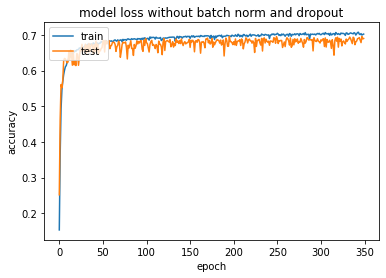

In [72]:
# summarize history for accuracy
plt.plot(history_w_bn_dl.history['accuracy'])
plt.plot(history_w_bn_dl.history['val_accuracy'])
plt.title('model loss without batch norm and dropout')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


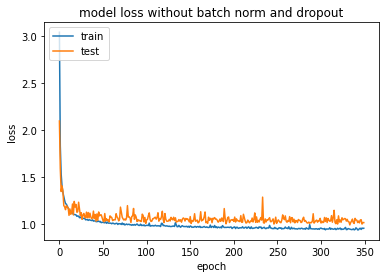

In [73]:
# summarize history for loss
plt.plot(history_w_bn_dl.history['loss'])
plt.plot(history_w_bn_dl.history['val_loss'])
plt.title('model loss without batch norm and dropout')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
model = Sequential()

model.add(Dense(50, input_shape = (1024, )))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(BatchNormalization())
model.add(Activation('relu'))    
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                51250     
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
activation_5 (Activation)    (None, 50)                0         
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
activation_6 (Activation)    (None, 50)               

In [19]:
history = model.fit(X_train, y_train, epochs = 350, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/350
1313/1313 [==============================] - 5s 3ms/step - loss: 2.1840 - accuracy: 0.1943 - val_loss: 1.8516 - val_accuracy: 0.3516
Epoch 2/350
1313/1313 [==============================] - 4s 3ms/step - loss: 1.7522 - accuracy: 0.3797 - val_loss: 1.8076 - val_accuracy: 0.3854
Epoch 3/350
1313/1313 [==============================] - 4s 3ms/step - loss: 1.5685 - accuracy: 0.4688 - val_loss: 1.4547 - val_accuracy: 0.4890
Epoch 4/350
1313/1313 [==============================] - 4s 3ms/step - loss: 1.4805 - accuracy: 0.5095 - val_loss: 1.4131 - val_accuracy: 0.5338
Epoch 5/350
1313/1313 [==============================] - 4s 3ms/step - loss: 1.4176 - accuracy: 0.5369 - val_loss: 1.3592 - val_accuracy: 0.5627
Epoch 6/350
1313/1313 [==============================] - 5s 4ms/step - loss: 1.3619 - accuracy: 0.5603 - val_loss: 1.7134 - val_accuracy: 0.4464
Epoch 7/350
1313/1313 [==============================] - 5s 3ms/step - loss: 1.3319 - accuracy: 0.5735 - val_loss: 1.1703 - val_ac

In [20]:
model.evaluate(X_val.reshape(X_val.shape[0],-1), y_val)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5775 - accuracy: 0.8294


[0.5775313973426819, 0.8293833136558533]

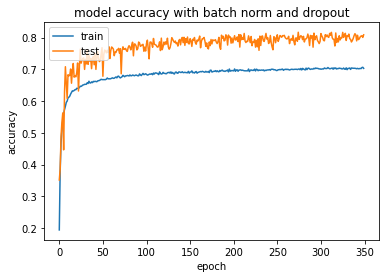

In [74]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy with batch norm and dropout')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


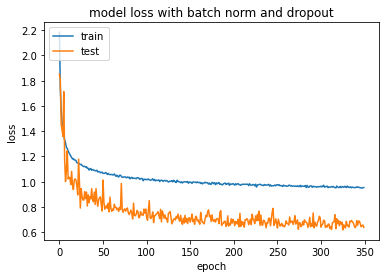

In [75]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss with batch norm and dropout')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
def fromCatToOrg(data):
  return_list = list()
  org_vals = tf.argmax(data, axis=1)
  for val in org_vals:
    return_list.append(val.numpy())
  return return_list

In [32]:
actual_y_val = fromCatToOrg(y_val)
actual_y_tst = fromCatToOrg(y_test)
actual_y_trn = fromCatToOrg(y_train)

In [61]:
eval_pred_w_bn_dl = model_w_bn_dl.predict(X_val.reshape(X_val.shape[0], -1))

In [62]:
eval_pred_w_bn_dl_org = fromCatToOrg(eval_pred_w_bn_dl)

In [65]:
print("ANN WITHOUT BATCH_NORMALISATION AND DROPOUT CLASSIFACTION REPORT")
print("\n")
print(classification_report(actual_y_val, eval_pred_w_bn_dl_org))

ANN WITHOUT BATCH_NORMALISATION AND DROPOUT CLASSIFACTION REPORT


              precision    recall  f1-score   support

           0       0.71      0.76      0.73      6000
           1       0.68      0.75      0.71      6000
           2       0.74      0.73      0.74      6000
           3       0.75      0.56      0.64      6000
           4       0.74      0.79      0.77      6000
           5       0.57      0.75      0.65      6000
           6       0.71      0.70      0.71      6000
           7       0.73      0.74      0.74      6000
           8       0.81      0.59      0.68      6000
           9       0.70      0.71      0.70      6000

    accuracy                           0.71     60000
   macro avg       0.72      0.71      0.71     60000
weighted avg       0.72      0.71      0.71     60000



CONFUSION MATRIX FOR ANN WITHOUT BATCH_NORMALISATION AND DROPOUT




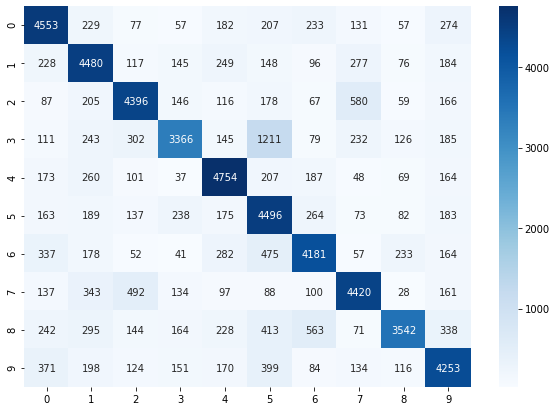

In [78]:
print("CONFUSION MATRIX FOR ANN WITHOUT BATCH_NORMALISATION AND DROPOUT")
print("\n")
confusion_matrix_ann1 = confusion_matrix(actual_y_val, eval_pred_w_bn_dl_org)
confusion_matrix_ann1_df = pd.DataFrame(confusion_matrix_ann1)
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix_ann1_df, annot=True, cmap='Blues', fmt='g')

In [66]:
eval_pred = model.predict(X_val.reshape(X_val.shape[0], -1))

In [67]:
eval_pred_org = fromCatToOrg(eval_pred)

In [68]:
print("ANN WITH BATCH_NORMALISATION AND DROPOUT CLASSIFACTION REPORT")
print("\n")
print(classification_report(actual_y_val, eval_pred_org))

ANN WITH BATCH_NORMALISATION AND DROPOUT CLASSIFACTION REPORT


              precision    recall  f1-score   support

           0       0.87      0.86      0.87      6000
           1       0.79      0.87      0.83      6000
           2       0.89      0.83      0.86      6000
           3       0.77      0.79      0.78      6000
           4       0.91      0.84      0.87      6000
           5       0.80      0.81      0.81      6000
           6       0.87      0.78      0.82      6000
           7       0.82      0.89      0.85      6000
           8       0.82      0.77      0.80      6000
           9       0.78      0.84      0.81      6000

    accuracy                           0.83     60000
   macro avg       0.83      0.83      0.83     60000
weighted avg       0.83      0.83      0.83     60000



CONFUSION MATRIX FOR ANN WIT BATCH_NORMALISATION AND DROPOUT




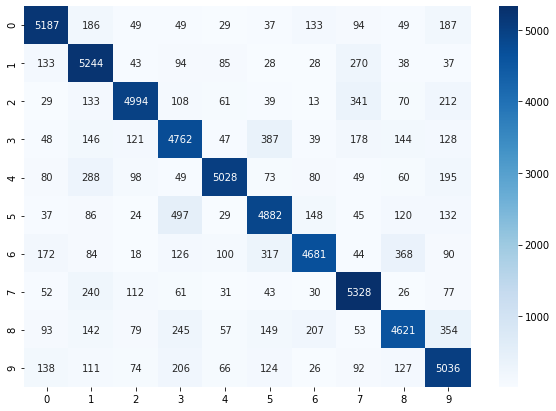

In [80]:
print("CONFUSION MATRIX FOR ANN WIT BATCH_NORMALISATION AND DROPOUT")
print("\n")
confusion_matrix_ann = confusion_matrix(actual_y_val, eval_pred_org)
confusion_matrix_ann_df = pd.DataFrame(confusion_matrix_ann)
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix_ann_df, annot=True, cmap='Blues', fmt='g')

### **<u>Conclusion:</u>**
<p>Looking at the accuracy precision recall  f1-score of both the models trained with and without batch normalisation and dropout layer, model with batch normalisation and dropout layer is good in compare with the model without batch normalisation and dropout layer.</p>